In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [116]:
# 导入商品数据
#纸巾
tissue = pd.read_csv(r'E:\datas\tissue.csv',error_bad_lines=False)
#卷纸
roll = pd.read_csv(r'E:\datas\paper\roll.csv',error_bad_lines=False)
#手帕纸
hand = pd.read_csv(r'E:\datas\paper\hand.csv',error_bad_lines=False)

b'Skipping line 2001: expected 15 fields, saw 29\n'
b'Skipping line 2001: expected 15 fields, saw 29\nSkipping line 4001: expected 15 fields, saw 29\n'
b'Skipping line 2001: expected 15 fields, saw 29\n'


### 数据清洗

In [117]:
# 看一下各个数据的info
print(tissue.info())
print(roll.info())
print(hand.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 15 columns):
搜索关键词    3539 non-null object
商品名称     3538 non-null object
商品SKU    3539 non-null int64
商品链接     3539 non-null object
封面图链接    1940 non-null object
价格       3539 non-null float64
评价人数     3539 non-null object
评论链接     3538 non-null object
商家店名     3539 non-null object
店铺链接     3507 non-null object
标签       3057 non-null object
是否广告     3539 non-null object
页码       3539 non-null int64
当前时间     3539 non-null object
页面网址     3539 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 414.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 15 columns):
搜索关键词    4978 non-null object
商品名称     4978 non-null object
商品SKU    4978 non-null int64
商品链接     4978 non-null object
封面图链接    2737 non-null object
价格       4978 non-null float64
评价人数     4978 non-null object
评论链接     4978 non-null object
商家店名     4978 non-null obje

In [118]:
# 字段相同，拼接到一起
paper = pd.concat([tissue,roll,hand],ignore_index=True)
paper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11096 entries, 0 to 11095
Data columns (total 15 columns):
搜索关键词    11096 non-null object
商品名称     11095 non-null object
商品SKU    11096 non-null int64
商品链接     11096 non-null object
封面图链接    6092 non-null object
价格       11096 non-null float64
评价人数     11096 non-null object
评论链接     11095 non-null object
商家店名     11096 non-null object
店铺链接     11027 non-null object
标签       9252 non-null object
是否广告     11096 non-null object
页码       11096 non-null int64
当前时间     11096 non-null object
页面网址     11096 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 1.3+ MB


In [119]:
# 挑选需要的字段
paper = paper[['搜索关键词','商品名称','商品SKU','价格','评价人数','商家店名','标签']]
paper.head()

,搜索关键词,商品名称,商品SKU,价格,评价人数,商家店名,标签
0,抽纸,京东超市\n维达(Vinda) 抽纸 超韧3层130抽软抽*24包纸巾(小规格) 整箱销售（...,2828950,59.90,\n\t\t\t\t\t\t525万+\n\t\t\t\t\t,\n维达京东自营旗舰店\t\t\t\t\t,自营/\r\n闪购/\r\n满119-20/
1,抽纸,京东超市\n清风（APP）抽纸 柔韧2层200抽软抽*20包纸巾（新老包装交替发货）（整箱售卖）,2015246,48.90,\n\t\t\t\t\t\t422万+\n\t\t\t\t\t,\n清风京东自营旗舰店\t\t\t\t\t,自营/\r\n满138-20/
2,抽纸,山丘 抽纸竹浆本色无漂白擦手纸巾3层100抽30包XS码（小规格）,100005855540,39.90,\n\t\t\t\t\t\t4.8万+\n\t\t\t\t\t,\n山丘（HILLSIDE）京东自营旗舰店\t\t\t\t\t,自营/
3,抽纸,京东超市\n清风（APP）抽纸 原木纯品金装系列 3层120抽软抽*24包纸巾（整箱销售）（...,2877592,57.89,\n\t\t\t\t\t\t334万+\n\t\t\t\t\t,\n清风京东自营旗舰店\t\t\t\t\t,自营/\r\n满169-30/
4,抽纸,京东超市\n洁柔(C&S)抽纸 粉Face 柔韧330张面巾纸*24包 无香(M号 可湿水婴...,7224900,58.80,\n\t\t\t\t\t\t256万+\n\t\t\t\t\t,\n洁柔京东自营官方旗舰店\t\t\t\t\t,自营/\r\n放心购/\r\n秒杀/\r\n券100-10/


In [121]:
# 将字段重新命名
paper.columns=['class','title','sku','price','comments','shop','label']
paper.head()

,class,title,sku,price,comments,shop,label
0,抽纸,京东超市\n维达(Vinda) 抽纸 超韧3层130抽软抽*24包纸巾(小规格) 整箱销售（...,2828950,59.90,\n\t\t\t\t\t\t525万+\n\t\t\t\t\t,\n维达京东自营旗舰店\t\t\t\t\t,自营/\r\n闪购/\r\n满119-20/
1,抽纸,京东超市\n清风（APP）抽纸 柔韧2层200抽软抽*20包纸巾（新老包装交替发货）（整箱售卖）,2015246,48.90,\n\t\t\t\t\t\t422万+\n\t\t\t\t\t,\n清风京东自营旗舰店\t\t\t\t\t,自营/\r\n满138-20/
2,抽纸,山丘 抽纸竹浆本色无漂白擦手纸巾3层100抽30包XS码（小规格）,100005855540,39.90,\n\t\t\t\t\t\t4.8万+\n\t\t\t\t\t,\n山丘（HILLSIDE）京东自营旗舰店\t\t\t\t\t,自营/
3,抽纸,京东超市\n清风（APP）抽纸 原木纯品金装系列 3层120抽软抽*24包纸巾（整箱销售）（...,2877592,57.89,\n\t\t\t\t\t\t334万+\n\t\t\t\t\t,\n清风京东自营旗舰店\t\t\t\t\t,自营/\r\n满169-30/
4,抽纸,京东超市\n洁柔(C&S)抽纸 粉Face 柔韧330张面巾纸*24包 无香(M号 可湿水婴...,7224900,58.80,\n\t\t\t\t\t\t256万+\n\t\t\t\t\t,\n洁柔京东自营官方旗舰店\t\t\t\t\t,自营/\r\n放心购/\r\n秒杀/\r\n券100-10/


In [122]:
# 字段清洗
# 1.将评论数转化为数字
def convert_comments(x):
    x = x.strip().strip('+')
    if x[-1] == '万':
        x = float(x[:-1])*10000
    else:
        x = int(x)
    return x
paper['comments'] = paper['comments'].apply(convert_comments)

In [123]:
# 2.去掉店铺名称中的空格
paper['shop'] = paper.shop.str.strip()

In [124]:
# 3.将标签转化为列表形式
def convert_label(x):
    if type(x) == float:
        x = []
    else:
        x = x.split('/')[:-1]
        x = [i.strip('\r\n') for i in x]
    return x
paper['label'] = paper['label'].apply(convert_label)

In [125]:
# 数据去重
paper = paper.drop_duplicates(['sku'])

In [126]:
# 看一下转化完的数据
paper.head()

,class,title,sku,price,comments,shop,label
0,抽纸,京东超市\n维达(Vinda) 抽纸 超韧3层130抽软抽*24包纸巾(小规格) 整箱销售（...,2828950,59.90,5250000.0,维达京东自营旗舰店,"[自营, 闪购, 满119-20]"
1,抽纸,京东超市\n清风（APP）抽纸 柔韧2层200抽软抽*20包纸巾（新老包装交替发货）（整箱售卖）,2015246,48.90,4220000.0,清风京东自营旗舰店,"[自营, 满138-20]"
2,抽纸,山丘 抽纸竹浆本色无漂白擦手纸巾3层100抽30包XS码（小规格）,100005855540,39.90,48000.0,山丘（HILLSIDE）京东自营旗舰店,[自营]
3,抽纸,京东超市\n清风（APP）抽纸 原木纯品金装系列 3层120抽软抽*24包纸巾（整箱销售）（...,2877592,57.89,3340000.0,清风京东自营旗舰店,"[自营, 满169-30]"
4,抽纸,京东超市\n洁柔(C&S)抽纸 粉Face 柔韧330张面巾纸*24包 无香(M号 可湿水婴...,7224900,58.80,2560000.0,洁柔京东自营官方旗舰店,"[自营, 放心购, 秒杀, 券100-10]"


### 数据探索

#### 销量

##### 抽纸销量top10

In [127]:
# 抽纸销量top10
tissue_10 = paper[paper['class']=='抽纸'].sort_values('comments',ascending=False)[:10]
tissue_10

,class,title,sku,price,comments,shop,label
0,抽纸,京东超市\n维达(Vinda) 抽纸 超韧3层130抽软抽*24包纸巾(小规格) 整箱销售（...,2828950,59.9,5250000.0,维达京东自营旗舰店,"[自营, 闪购, 满119-20]"
11,抽纸,京东超市\n维达(Vinda) 抽纸 超韧系列软抽3层120抽*8包（中规格 母婴可用）,8525506,19.9,5250000.0,维达京东自营旗舰店,"[自营, 满119-20]"
657,抽纸,京东超市\n维达（Vinda) 抽纸纸巾 超韧Just 1 颐和园IP软抽S码4层100抽*...,100004577343,59.9,4750000.0,维达京东自营旗舰店,"[自营, 放心购, 满119-19]"
36,抽纸,京东超市\n维达(Vinda) 抽纸纸巾 超韧3层130抽软抽*6包(小规格),854240,15.9,4750000.0,维达京东自营旗舰店,"[自营, 闪购, 满119-20]"
25,抽纸,京东超市\n维达(Vinda) 抽纸纸巾 超韧3层126抽软抽*20包(小规格) 整箱销售,8622236,49.9,4750000.0,维达京东自营旗舰店,"[自营, 放心购, 满169-30]"
425,抽纸,京东超市\n维达（Vinda) 抽纸纸巾 超韧Just 1 颐和园IP软抽S码4层100抽*...,100004577345,32.9,4750000.0,维达京东自营旗舰店,"[自营, 放心购, 秒杀, 满119-20]"
100,抽纸,京东超市\n洁柔(C&S)抽纸 快乐柠檬黄2层180抽面巾纸*20包 无香(整箱销售 温和亲...,5535392,43.9,4660000.0,洁柔京东自营官方旗舰店,"[自营, 放心购, 券100-10]"
96,抽纸,京东超市\n洁柔（C&S）抽纸 黑Face 可湿水3层150抽面巾纸*3包 古龙香水味(L大...,1120714,13.9,4660000.0,洁柔京东自营官方旗舰店,"[自营, 放心购, 券188-20]"
66,抽纸,京东超市\n洁柔(C&S)抽纸 黑Face 可湿水3层130抽面巾纸*18包 无香(M中号纸...,2587499,58.8,4660000.0,洁柔京东自营官方旗舰店,"[自营, 放心购, 秒杀, 券100-10]"
46,抽纸,京东超市\n洁柔(C&S)抽纸 粉Face 柔韧3层120抽面巾纸*24包 无香(可湿水面子...,5911531,62.9,4660000.0,洁柔京东自营官方旗舰店,"[自营, 放心购, 券100-10]"


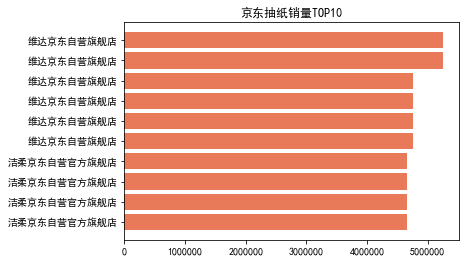

In [128]:
plt.rcParams['font.family'] = 'SimHei'
plt.barh(range(10),tissue_10[::-1]['comments'],color='#e87a59')
plt.yticks(range(10),tissue_10[::-1]['shop'])
plt.title('京东抽纸销量TOP10')
plt.show()

##### 卷纸销量top10

In [129]:
# 卷纸销量top10
roll_10 = paper[paper['class']=='卷纸'].sort_values('comments',ascending=False)[:10]
roll_10

,class,title,sku,price,comments,shop,label
3539,卷纸,京东超市\n维达(Vinda) 卷纸 蓝色经典4层140g卫生纸巾*27卷（整箱销售）,1241849,53.9,9230000.0,维达京东自营旗舰店,"[自营, 定期, 秒杀, 满119-20, 赠]"
3540,卷纸,京东超市\n维达(Vinda) 卷纸 蓝色经典4层200g卫生纸巾*27卷(整箱销售),1082266,79.9,9230000.0,维达京东自营旗舰店,"[自营, 放心购, 满119-20]"
3636,卷纸,维达(Vinda) 卷纸 蓝色经典4层180g卫生纸巾*27卷(整箱销售),1082255,74.8,9230000.0,维达京东自营旗舰店,"[自营, 放心购, 满119-19]"
3550,卷纸,京东超市\n维达(Vinda) 卷纸 蓝色经典4层160g卫生纸巾*27卷 (整箱销售),3761626,66.9,9230000.0,维达京东自营旗舰店,"[自营, 放心购, 满119-20]"
3555,卷纸,京东超市\n维达(Vinda) 卷纸 蓝色经典3层140g卫生纸巾*30卷（3层与4层随机发货）,836075,62.5,9230000.0,维达京东自营旗舰店,"[自营, 闪购, 满119-20]"
3563,卷纸,京东超市\n维达(Vinda) 卷纸 蓝色经典3层160g卫生纸巾*10卷,854229,22.6,5310000.0,维达京东自营旗舰店,"[自营, 满119-20]"
3544,卷纸,京东超市\n维达(Vinda) 卷纸 蓝色经典3层200g卫生纸巾*10卷（3层与4层随机发货）,836068,29.9,5310000.0,维达京东自营旗舰店,"[自营, 放心购, 闪购, 满119-20]"
3546,卷纸,京东超市\n维达(Vinda) 卷纸 蓝色经典4层140g卫生纸巾*10卷,209951,20.5,5310000.0,维达京东自营旗舰店,"[自营, 放心购, 门店有售, 满119-20]"
3617,卷纸,京东超市\n清风（APP）卷纸卫生纸 原木纯品3层240段27卷+5卷享32卷卫生纸巾（整箱销售）,100003919890,65.0,3400000.0,清风京东自营旗舰店,"[自营, 满169-30]"
4112,卷纸,清风（APP）卷纸 原木Junior系列 卫生纸巾4层110克27卷（整箱销售）,100006779762,69.9,3400000.0,清风京东自营旗舰店,"[自营, 满169-30]"


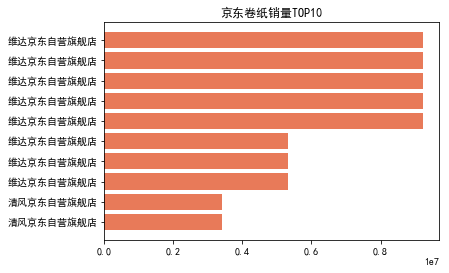

In [130]:
plt.barh(range(10),roll_10[::-1]['comments'],color='#e87a59')
plt.yticks(range(10),roll_10[::-1]['shop'])
plt.title('京东卷纸销量TOP10')
plt.show()

##### 手帕纸销量top10

In [131]:
# 手帕纸销量top10
hand_10 = paper[paper['class']=='手帕纸'].sort_values('comments',ascending=False)[:10]
hand_10

,class,title,sku,price,comments,shop,label
8517,手帕纸,维达(Vinda) 手帕纸 超韧4层纸巾*36包(无香)（36包/袋）,1374810,19.9,3220000.0,维达京东自营旗舰店,"[自营, 满减, 放心购]"
8527,手帕纸,京东超市\n维达(Vinda) 手帕纸 超韧4层纸巾*108包(无香) 整箱销售,100002390689,59.9,3220000.0,维达京东自营旗舰店,"[自营, 放心购, 闪购, 满169-30]"
8518,手帕纸,京东超市\n维达(Vinda) 手帕纸 超韧4层纸巾*18包(无香)(新旧产品交替发货）,1190594,9.8,3220000.0,维达京东自营旗舰店,"[自营, 放心购, 门店有售, 满119-20]"
8619,手帕纸,京东超市\n清风（APP) 抽纸 原木纯品3层120抽软抽手帕纸*30包纸巾(整箱销售）,100003277727,59.9,2450000.0,清风京东自营旗舰店,"[自营, 满169-30]"
8542,手帕纸,京东超市\n清风 (APP）手帕纸 3层10张纸巾*96包 (整箱销售)（新老包装交替发货）,3381493,39.9,2030000.0,清风京东自营旗舰店,[自营]
8523,手帕纸,清风（APP）手帕纸 原木纯品金装系列 加厚4层8张纸巾*60包（整箱销售）（新老包装交替发货）,1244209,29.6,2030000.0,清风京东自营旗舰店,[自营]
9490,手帕纸,京东超市\n维达(Vinda) 手帕纸 超韧4层纸巾*36包(无香)（36包/袋）,100008802210,20.9,2030000.0,维达京东自营旗舰店,"[自营, 放心购]"
8551,手帕纸,京东超市\n心相印茶语手帕纸 经典系列 4层6条*12包 （整箱销售/新老包装随机发货）,4624204,33.9,1770000.0,心相印京东自营官方旗舰店,[自营]
8553,手帕纸,京东超市\n心相印手帕纸 茶语系列 4层8片纸巾*12包精装（新老包装随机发货）,1236032,6.8,1770000.0,心相印京东自营官方旗舰店,"[自营, 放心购]"
8532,手帕纸,京东超市\n心相印手帕纸 茶语系列4层7片*12包（新）/3层10片*10包（老）C1710...,1236034,5.9,1770000.0,心相印京东自营官方旗舰店,"[自营, 放心购]"


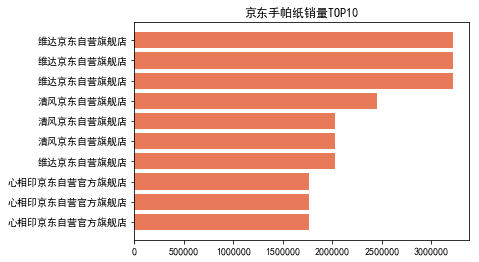

In [133]:
plt.barh(range(10),hand_10[::-1]['comments'],color='#e87a59')
plt.yticks(range(10),hand_10[::-1]['shop'])
plt.title('京东手帕纸销量TOP10')
plt.show()

- 从三种纸品的销量来看维达纸品拥有绝对的优势
- 维达抽纸占据销量TOP10的前6席
- 维达卷纸占据销量TOP10的前8席
- 维达抽纸也有四款销量进去TOP10，并且牢牢占据前三的位置
- 其中在抽纸领域洁柔的4明星款产品和维达的明星单品销量相差无几，是个很有实力的竞争者

#### 价格

##### 三类纸品的价格分布图

In [139]:
# 抽纸价格分布图
paper[paper['class']=='抽纸']['price'].describe()

count    3469.000000
mean       49.758461
std        44.315986
min         0.800000
25%        18.800000
50%        38.000000
75%        62.500000
max       399.000000
Name: price, dtype: float64

Text(0.5,1,'抽纸价格分布图')

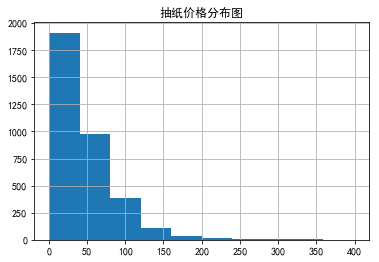

In [140]:
paper[paper['class']=='抽纸']['price'].hist()
plt.title('抽纸价格分布图')

- 抽纸的价格主要集中在0-80之间

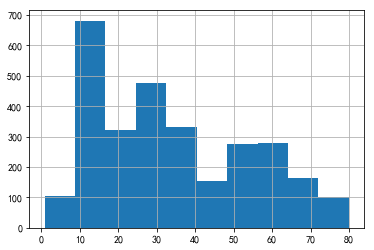

In [141]:
# 看看在0-80之间是如何分布的
paper[(paper['class']=='抽纸')&(paper['price']<80)]['price'].hist()

In [142]:
# 卷纸价格分布图
paper[paper['class']=='卷纸']['price'].describe()

count    4836.000000
mean       57.447961
std        49.097657
min         0.540000
25%        28.890000
50%        45.900000
75%        69.900000
max      1240.000000
Name: price, dtype: float64

Text(0.5,1,'卷纸价格分布图')

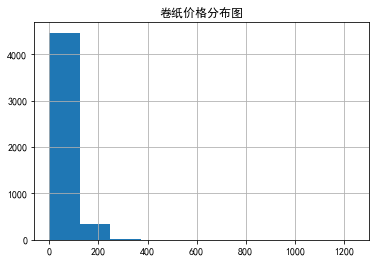

In [143]:
paper[paper['class']=='卷纸']['price'].hist()
plt.title('卷纸价格分布图')

- 0-100占据大多数

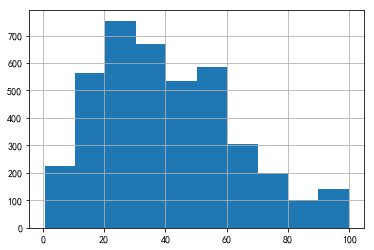

In [144]:
# 看看0-100价格是如何分布的
paper[(paper['class']=='卷纸')&(paper['price']<100)]['price'].hist()

- 整体价格在10-60之间
- 定价在20-40之间比较多

In [145]:
# 手帕纸价格分布图
paper[paper['class']=='手帕纸']['price'].describe()

count    2405.000000
mean       37.695472
std        66.093970
min         0.680000
25%        13.900000
50%        27.900000
75%        39.900000
max      1900.000000
Name: price, dtype: float64

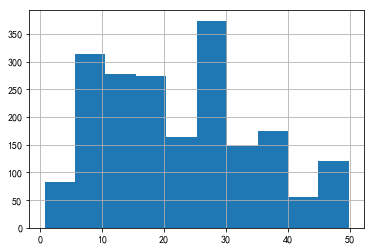

In [147]:
# 3/4分位是39.9，我们看一下50元以下价格分布图
paper[(paper['class']=='手帕纸')&(paper['price']<50)]['price'].hist()

- 价格主要在6-20以及25-30这两个区间分布较多

### 店铺

In [149]:
# 店铺数量
paper['shop'].unique().shape

(792,)

In [153]:
# 自营店铺数量
def is_own(x):
    if '自营' in x:
        return 1
    else:
        return 0

In [156]:
# 新增字段is_own表示是否京东自营
paper['is_own'] = paper['label'].apply(is_own)

In [159]:
# 自营单品有多少
(paper['is_own'].sum())/paper.shape[0]

0.10746965452847806

In [161]:
# 自营店铺有多少个
paper.query('is_own==1')['shop'].unique().shape

(54,)

In [170]:
# 自营店铺单品数量TOP10
paper.query("is_own==1&shop!=''")['shop'].value_counts()[:10]

洁柔京东自营官方旗舰店     108
清风京东自营旗舰店        78
维达京东自营旗舰店        76
沃尔玛京东自营官方旗舰店     68
心相印京东自营官方旗舰店     53
霏羽纸品京东自营旗舰店      50
斑布京东自营官方旗舰店      49
洁云京东自营旗舰店        46
泉林本色京东自营旗舰店      45
得宝京东自营旗舰店        44
Name: shop, dtype: int64

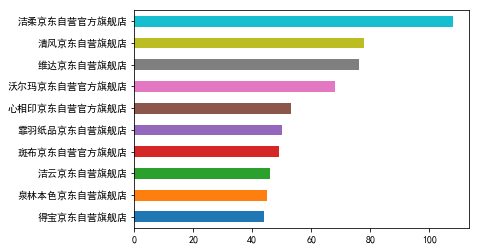

In [178]:
# 单品数量top10店铺
paper.query("is_own==1&shop!=''")['shop'].value_counts()[:10][::-1].plot.barh()

In [175]:
# 销量top10店铺
shop_comments_table = paper.query("is_own==1&shop!=''").pivot_table(index='shop',values='comments',aggfunc='sum')
shop_comments_table.sort_values('comments',ascending=False)[:10]

,comments
shop,
维达京东自营旗舰店,154991900.0
洁柔京东自营官方旗舰店,143462700.0
清风京东自营旗舰店,96944070.0
心相印京东自营官方旗舰店,65929300.0
泉林本色京东自营旗舰店,32220000.0
得宝京东自营旗舰店,30500400.0
舒洁京东自营旗舰店,18521700.0
斑布京东自营官方旗舰店,17112600.0
顺清柔京东自营官方旗舰店,10164700.0


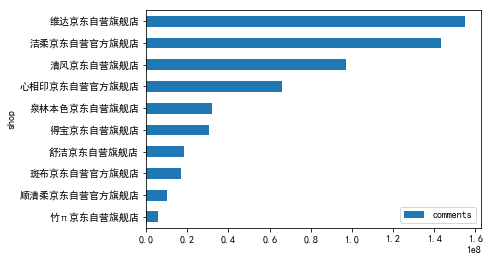

In [177]:
shop_comments_table.sort_values('comments',ascending=False)[:10][::-1].plot.barh()

- 总共有792家店铺，其中京东自营有54家
- 自营单品数占总单品数的10.7%
- 自营店铺单品数量最多的是洁柔，也是唯一个单品数超过100的
- 总销量前三席是 维达，洁柔，清风
- 维达的单品数目并没有洁柔和清风多，但是平均每个单品的销量更高

#### 标题词云

In [188]:
# 先将缺失标题删除
paper.dropna(axis=0,how='any',inplace=True)
tissue_title = ''
for i in paper[paper['class']=='抽纸']['title']:
    tissue_title += i
roll_title = ''
for i in paper[paper['class']=='卷纸']['title']:
    roll_title += i
hand_title = ''
for i in paper[paper['class']=='手帕纸']['title']:
    hand_title += i

In [205]:
# 抽纸
# 分词
import jieba
import collections
tissue_words = jieba.lcut(tissue_title)
tissue_word_counts = dict(collections.Counter(tissue_words))
excludes = [' ','（','*','/','京东','\n','装','】','【','）',')']
for word in excludes:
    del tissue_word_counts[word]
tissue_items = list(tissue_word_counts.items())
tissue_items.sort(key=lambda x:x[1],reverse=True)
#tissue_items[:30]

In [193]:
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud
from pyecharts.globals import SymbolType
word = WordCloud()
word.add('',tissue_items[:30],word_size_range=[20, 100],shape=SymbolType.DIAMOND)
word.set_global_opts(title_opts=opts.TitleOpts(title="抽纸标题词云图"))
word.render_notebook()

抽纸的标题主要强调以下信息
- 规格：比如3层，6包，120抽，整箱
- 用途：擦手纸，面巾纸，餐巾纸
- 品牌：洁柔，维达
- 质地：本色，竹浆，软

In [211]:
# 卷纸
roll_words = jieba.lcut(roll_title)
roll_word_counts = dict(collections.Counter(roll_words))
excludes = [' ','（','*','/','京东','\n','装','】','【','）',')','有']
for word in excludes:
    del roll_word_counts[word]
roll_items = list(roll_word_counts.items())
roll_items.sort(key=lambda x:x[1],reverse=True)
#roll_items[:30]

In [208]:
word = WordCloud()
word.add('',roll_items[:30],word_size_range=[20, 100],shape=SymbolType.DIAMOND)
word.set_global_opts(title_opts=opts.TitleOpts(title="卷纸标题词云图"))
word.render_notebook()

卷纸的标题主要强调以下信息
- 规格：3层，12卷，10卷，100克
- 用途：厕纸,大盘纸
- 有无芯
- 质地：加厚，竹浆

In [214]:
# 手帕纸
hand_words = jieba.lcut(hand_title)
hand_word_counts = dict(collections.Counter(hand_words))
excludes = [' ','（','*','/','京东','\n','装','】','【','）',')','有']
for word in excludes:
    del hand_word_counts[word]
hand_items = list(hand_word_counts.items())
hand_items.sort(key=lambda x:x[1],reverse=True)
#hand_items[:30]

In [215]:
word = WordCloud()
word.add('',hand_items[:30],word_size_range=[20, 100],shape=SymbolType.DIAMOND)
word.set_global_opts(title_opts=opts.TitleOpts(title="手帕纸标题词云图"))
word.render_notebook()

手帕纸的标题主要强调以下信息
- 规格：3层，10包
- 用途：面巾纸，餐巾纸
- 大小：便携，迷你
- 质地：加厚，本色，无香，印花

#### 京东维达纸巾评论


In [217]:
comments = pd.read_csv('E:/datas/paper/comments.csv')
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
会员      1000 non-null object
级别      1000 non-null object
评价星级    1000 non-null object
评价内容    1000 non-null object
时间      1000 non-null object
点赞数     1000 non-null int64
评论数     1000 non-null int64
追评时间    27 non-null object
追评内容    21 non-null object
商品属性    1000 non-null object
页面网址    1000 non-null object
页面标题    1000 non-null object
采集时间    1000 non-null object
dtypes: int64(2), object(11)
memory usage: 101.6+ KB


In [219]:
comments.head(1)

,会员,级别,评价星级,评价内容,时间,点赞数,评论数,追评时间,追评内容,商品属性,页面网址,页面标题,采集时间
0,C为你钟情为你疯狂L...,PLUS会员,star5,纸张遇水不会破，也不会有很细的纸屑。小包包装经济实惠。用起来方便也不会心疼。好评包装没有破损...,2019-10-12 14:16,32,8,[购买1天后追评],NaN,超韧S码130抽*24包 ...,https://item.jd.com/2828950.html#none,【维达抽纸】维达(Vinda) 抽纸 超韧3层130抽软抽*24包纸巾(小规格) 整箱销售（...,2019-12-17 09:04:31.262


In [220]:
# 评分占比
comments['评价星级'].value_counts()

star5    1000
Name: 评价星级, dtype: int64

In [221]:
comments_str = ''
for i in comments['评价内容']:
    comments_str += i

In [224]:
comments_words = jieba.lcut(comments_str)
comments_word_counts = dict(collections.Counter(comments_words))
excludes = [' ','（','*','/','京东','\n','装','】','【','）',')','有','，','的','。','很','用','也','是','都','！','没有'
           ,'不','就','在','起来','这个','了','我',',']
for word in excludes:
    del comments_word_counts[word]
comments_items = list(comments_word_counts.items())
comments_items.sort(key=lambda x:x[1],reverse=True)
comments_items[:30]

[('好', 1409),
 ('维达', 886),
 ('买', 830),
 ('纸巾', 705),
 ('抽纸', 658),
 ('非常', 609),
 ('纸', 549),
 ('不错', 481),
 ('一直', 451),
 ('质量', 423),
 ('纸张', 386),
 ('不会', 371),
 ('破', 369),
 ('柔软', 342),
 ('可以', 311),
 ('还', 305),
 ('比较', 300),
 ('包装', 298),
 ('方便', 296),
 ('湿水', 289),
 ('纸屑', 280),
 ('快递', 274),
 ('购买', 270),
 ('活动', 266),
 ('家里', 250),
 ('物流', 247),
 ('价格', 244),
 ('喜欢', 230),
 ('抽', 229),
 ('纸质', 227)]

In [225]:
word = WordCloud()
word.add('',comments_items[:30],word_size_range=[20, 100],shape=SymbolType.DIAMOND)
word.set_global_opts(title_opts=opts.TitleOpts(title="评论词云图"))
word.render_notebook()